In [14]:
# local de aquisição dos dados: https://transparencia.registrocivil.org.br/dados-covid-download
# Instanciando ambiente virtual: https://www.alura.com.br/artigos/ambientes-virtuais-em-python
# comando para instanciar a VM foi: py -m venv venv
# para ativação foi utilizado: venv\Scripts\Activate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set_palette('Accent')

In [9]:
df_2019 = pd.read_csv('../Dados/obitos-2019.csv')
df_2020 = pd.read_csv('../Dados/obitos-2020.csv')

In [10]:
total_obitos_2019 = df_2019.groupby('tipo_doenca').sum()
total_obitos_2020 = df_2020.groupby('tipo_doenca').sum()

In [11]:
proporcao = total_obitos_2020 / total_obitos_2019

In [12]:
def grafico_comparativo(causa):
    total_2019 = df_2019.groupby('tipo_doenca').sum()
    total_2020 = df_2020.groupby('tipo_doenca').sum()

    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    dados = pd.DataFrame({'Total':lista,
                         'Ano': [2019, 2020]})

    plt.figure(figsize=(15,5))
    sns.barplot(y = 'Ano', x = 'Total', data = dados, orient = 'h')
    plt.title('Óbitos por {}'.format(causa))
    plt.xticks(rotation = 45)
    plt.xlabel('Total de óbitos')
    plt.ylabel('Anos Visualizados')
    plt.show()

In [13]:
def grafico_comparativo(causa = 'TODAS', estado="BRASIL"):

    if estado == 'BRASIL':
        total_2019 = df_2019.groupby('tipo_doenca').sum()
        total_2020 = df_2020.groupby('tipo_doenca').sum()
        if causa == 'TODAS':
            lista = [total_2019['total'].sum(), total_2020['total'].sum()]
        else:
            lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    else:
        total_2019 = df_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = df_2020.groupby(['uf','tipo_doenca']).sum()
        if causa == 'TODAS':
            lista = [int(total_2019.loc[estado].sum()), int(total_2020.loc[estado].sum())]
        else:
            lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

    dados = pd.DataFrame({'Total':lista,
                         'Ano': [2019, 2020]})

    plt.figure(figsize=(15,5))
    ax = sns.barplot(y = 'Ano', x = 'Total', data = dados, orient = 'h')
    plt.title('Óbitos por {} - {}'.format(causa, estado))
    plt.xticks(rotation = 45)
    plt.xlabel('Total de óbitos')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))
    plt.ylabel('Anos Visualizados')
    plt.show()

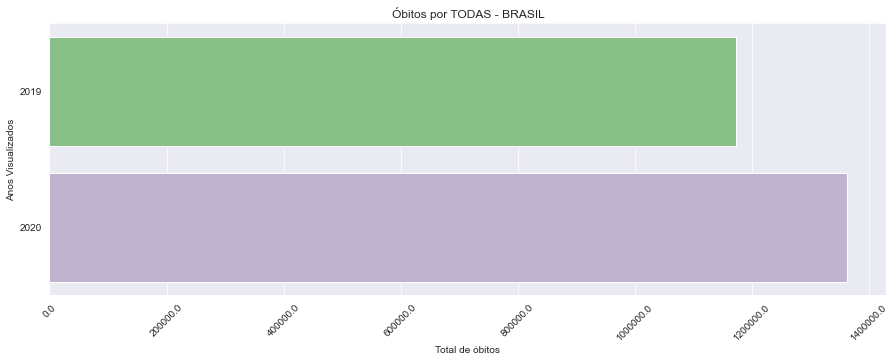

In [15]:
grafico_comparativo()

In [25]:
df_2019.query('tipo_doenca == "COVID"')

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
10025,MA,COVID,HOSPITAL,90 - 99,M,1


In [24]:
df_2020.query('tipo_doenca == "COVID"')

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
9,AC,COVID,HOSPITAL,< 9,F,2
10,AC,COVID,HOSPITAL,< 9,M,9
36,AL,COVID,HOSPITAL,< 9,F,7
37,AL,COVID,HOSPITAL,< 9,M,5
38,AL,COVID,OUTROS_SERVICOS_SAUDE,< 9,M,1
...,...,...,...,...,...,...
14907,SP,COVID,HOSPITAL,N/I,I,7
14908,SP,COVID,HOSPITAL,N/I,M,33
14909,SP,COVID,IGNORADO,N/I,M,1
14966,TO,COVID,HOSPITAL,N/I,F,1
